References


The code has been referred from the below link to understand and I extended it for other various models
https://www.kaggle.com/rishabh0502/fake-news-classifier-using-random-forest-93/notebook

https://www.delftstack.com/howto/python/python-bold-text/

https://www.kaggle.com/c/fake-news/data?select=train.csv

Please note that some references are also added in blog post




# Fake news classifier

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import time
import warnings
warnings.filterwarnings("ignore")
news_file = pd.read_csv("https://drive.google.com/uc?export=download&id=1qIvqLzSo9ZxDRXPS1TYzCpZgVETB1WZM")
df = news_file.dropna()
print('\033[1m'+ "\n\t\t\t\t\t\tDataset\n" + '\033[0m')
df


						Dataset



,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [3]:
#@title Please select the training size
training_size = 0.82 #@param ["0.82", "0.90"] {type:"raw"}
# Some lines in this cell has been referred from https://www.kaggle.com/rishabh0502/fake-news-classifier-using-random-forest-93/notebook and modified as per the requirement
np.random.seed(5)
data1_label_drop = df.drop('label', errors='raise', axis=1)
data2 = df['label']

full_line =[]   
for row in range(len(data1_label_drop.title)): 
    full_line.append(' '.join(str(value).lower() for value in data1_label_drop.iloc[row,0:2])) 

tfidf = TfidfVectorizer()
data1 = tfidf.fit_transform(full_line)
X_train, X_test, y_train, y_test = train_test_split(data1, data2, train_size=training_size, random_state=0)
print('\033[1m'+ "\n\t\tX_train\n\n" + '\033[0m' ,X_train)
print('\033[1m'+ "\n\t\ty_train\n\n" + '\033[0m' ,y_train)
print('\033[1m'+ "\n\t\tX_test\n\n" + '\033[0m' ,X_test)
print('\033[1m'+ "\n\t\ty_test\n\n" + '\033[0m' ,y_test)


		X_train

   (0, 25794)	0.3263500927340711
  (0, 18801)	0.38261178724914713
  (0, 24795)	0.36615629648997283
  (0, 10949)	0.41074263450668524
  (0, 25036)	0.33802544923243477
  (0, 37850)	0.2019536642339229
  (0, 35731)	0.3172939826688845
  (0, 29541)	0.2688395540281894
  (0, 27597)	0.13830245033795205
  (0, 36297)	0.08401747715769935
  (0, 38206)	0.08416010560231872
  (0, 30259)	0.08153842379851263
  (0, 25427)	0.2676279943910713
  (0, 36151)	0.06917038633492423
  (1, 12141)	0.4362635963395373
  (1, 27085)	0.37650615427418477
  (1, 36361)	0.36688735453446436
  (1, 37342)	0.3273898337620676
  (1, 26618)	0.26352396226958075
  (1, 20587)	0.24710389705728886
  (1, 37911)	0.1939912561088294
  (1, 27910)	0.2254607806424564
  (1, 37795)	0.2000158179974588
  (1, 23243)	0.26677878196808763
  (1, 30515)	0.19542031126741627
  :	:
  (14991, 26003)	0.3035071772198953
  (14991, 36148)	0.21443205891331776
  (14991, 2987)	0.3310376939635799
  (14991, 37979)	0.17779919147850734
  (14991, 36297)	0.09

# MultinomialNaive Bayes

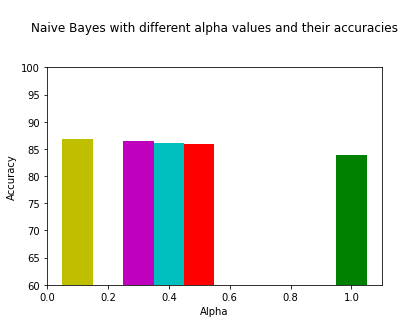


Naive Bayes gives an accuracy of [83.93074119076549, 85.84447144592953, 86.02673147023087, 86.45200486026732, 86.78614823815309]%


In [4]:
#@title Select an alpha value (Default values are selected)
Alpha_Value1 = 1 #@param ["1", "0.007"] {type:"raw"}
Alpha_Value2 = 0.5 #@param ["0.5", "0.006"] {type:"raw"}
Alpha_Value3 = 0.4 #@param ["0.4", "0.004"] {type:"raw"}
Alpha_Value4 = 0.3 #@param ["0.3", "0.003"] {type:"raw"}
Alpha_Value5 = 0.1 #@param ["0.1", "0.0001"] {type:"raw"}
starttime1 = time.time()
def naive_bayes(alpha):
  model_nb = MultinomialNB(alpha=alpha)
  model_nb.fit(X_train, y_train)
  y_pred = model_nb.predict(X_test)
  nb_accuracy = accuracy_score(y_test, y_pred)*100
  return nb_accuracy

alpha = [Alpha_Value1, Alpha_Value2, Alpha_Value3, Alpha_Value4, Alpha_Value5]
accuracy1 = []
for i in alpha:
  accuracy1.append(naive_bayes(i))
stoptime1 = time.time()
trainingtime1 = stoptime1 - starttime1  
plt.bar(alpha, accuracy1, width=0.1, color='grcmykb')
plt.ylim(60, 100)
plt.title("\nNaive Bayes with different alpha values and their accuracies\n\n")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.show()
print("\nNaive Bayes gives an accuracy of {}%".format(accuracy1))

# Random Forest Classifier

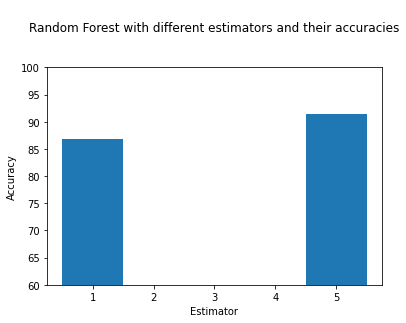


Random forest classifier gives an accuracy of [86.90765492102067, 91.49453219927096]%


In [5]:
#@title Select an estimator (Default values are selected)
Estimator_Value1 = 1 #@param ["1", "3"] {type:"raw"}
Estimator_Value2 = 5 #@param ["5", "8"] {type:"raw"}
starttime2 = time.time()
def randomforest(estimator):
  model_randomforest = RandomForestClassifier(n_estimators=estimator)
  model_randomforest.fit(X_train, y_train)
  y_pred = model_randomforest.predict(X_test)
  randomforest_accuracy = accuracy_score(y_test, y_pred)*100
  
  return randomforest_accuracy

estimator = [Estimator_Value1, Estimator_Value2]
accuracy2 = []
for i in estimator:
  accuracy2.append(randomforest(i))
stoptime2 = time.time()
trainingtime2 = stoptime2 - starttime2
plt.bar(estimator, accuracy2, width=1)
plt.ylim(60, 100)
plt.title("\nRandom Forest with different estimators and their accuracies\n\n")
plt.xlabel("Estimator")
plt.ylabel("Accuracy")
plt.show()
print("\nRandom forest classifier gives an accuracy of {}%".format(accuracy2))

# Logistic Regression

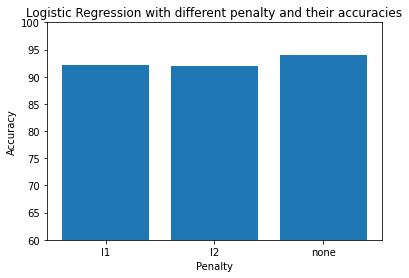


Logistic Regression gives an accuracy of [92.19319562575942, 91.98055893074118, 93.9854191980559]%


In [6]:
starttime3 = time.time()
def logistic_regression(penalty):
  model_logisticregression = LogisticRegression(penalty=penalty, solver='saga')
  model_logisticregression.fit(X_train, y_train)
  y_pred = model_logisticregression.predict(X_test)
  logisticregression_accuracy = accuracy_score(y_test, y_pred)*100
  return logisticregression_accuracy
  

penalty = ['l1', 'l2', 'none']
accuracy3 = []
for i in penalty:
  accuracy3.append(logistic_regression(i))
stoptime3 = time.time()  
trainingtime3 = stoptime3 - starttime3
plt.bar(penalty, accuracy3)
plt.ylim(60, 100)
plt.title("Logistic Regression with different penalty and their accuracies")
plt.xlabel("Penalty")
plt.ylabel("Accuracy")
plt.show()
print("\nLogistic Regression gives an accuracy of {}%".format(accuracy3))

# Decision Tree Classifier

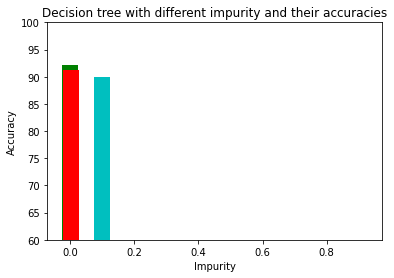


Decision tree gives an accuracy of [92.16281895504252, 91.28189550425273, 90.03645200486027, 55.893074119076545, 55.893074119076545]%


In [7]:
starttime4 = time.time()
def decisiontree(min_impurity_decrease):
  model_decisiontree = DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
  model_decisiontree.fit(X_train, y_train)
  y_pred = model_decisiontree.predict(X_test)
  decisiontree_accuracy = accuracy_score(y_test, y_pred)*100
  
  return decisiontree_accuracy

min_impurity_decrease = [0, 0.001, 0.1, 0.5, 0.9]
accuracy4 = []
for i in min_impurity_decrease:
  accuracy4.append(decisiontree(i))
stoptime4 = time.time()  
trainingtime4 = stoptime4 - starttime4 
plt.bar(min_impurity_decrease, accuracy4, width=0.05, color ='grcmykb')
plt.ylim(60, 100)
plt.title("Decision tree with different impurity and their accuracies")
plt.xlabel("Impurity")
plt.ylabel("Accuracy")
plt.show()
print("\nDecision tree gives an accuracy of {}%".format(accuracy4))

# K-Nearest Neighbor

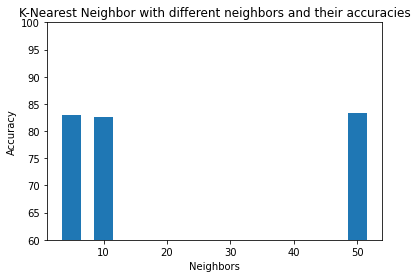


K-Nearest Neighbor gives an accuracy of [82.98906439854193, 82.65492102065613, 83.26245443499393]%


In [8]:
starttime5 = time.time()
def knearest(n_neighbors):
  model_knearest = KNeighborsClassifier(n_neighbors=n_neighbors)
  model_knearest.fit(X_train, y_train)
  y_pred = model_knearest.predict(X_test)
  knearest_accuracy = accuracy_score(y_test, y_pred)*100
  
  return knearest_accuracy

n_neighbors = [5, 10, 50]
accuracy5 = []
for i in n_neighbors:
  accuracy5.append(knearest(i))
stoptime5 = time.time()
trainingtime5 = stoptime5 - starttime5  
plt.bar(n_neighbors, accuracy5, width=3)
plt.ylim(60, 100)
plt.title("K-Nearest Neighbor with different neighbors and their accuracies")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()
print("\nK-Nearest Neighbor gives an accuracy of {}%".format(accuracy5))

# AdaBoostClassifier

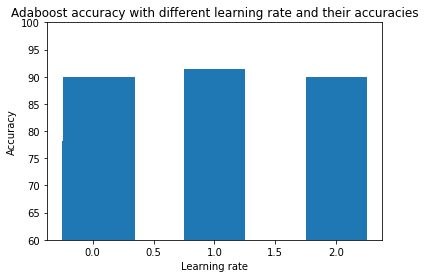


Adaboost gives an accuracy of [78.21992709599029, 90.03645200486027, 89.94532199270961, 91.3730255164034, 90.03645200486027]%


In [9]:
starttime6 = time.time()
def adaboost(learning_rate):
  model_adaboost = AdaBoostClassifier(learning_rate=learning_rate)
  model_adaboost.fit(X_train, y_train)
  y_pred = model_adaboost.predict(X_test)
  adaboost_accuracy = accuracy_score(y_test, y_pred)*100
  
  return adaboost_accuracy

learning_rate = [0.0001, 0.01, 0.1, 1, 2]
accuracy6 = []
for i in learning_rate:
  accuracy6.append(adaboost(i))
stoptime6 = time.time() 
trainingtime6 = stoptime6 - starttime6  
plt.bar(learning_rate, accuracy6, width=0.5)
plt.ylim(60, 100)
plt.title("Adaboost accuracy with different learning rate and their accuracies")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.show()
print("\nAdaboost gives an accuracy of {}%".format(accuracy6))

# Support Vector Machine

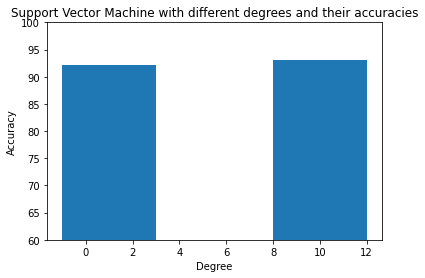


Support Vector Machine gives an accuracy of [92.13244228432563, 93.16524908869988]%


In [10]:
starttime7 = time.time()
def svmmodel(degree):
  model_svm = svm.SVC(C=degree)
  model_svm.fit(X_train, y_train)
  y_pred = model_svm.predict(X_test)
  svm_accuracy = accuracy_score(y_test, y_pred)*100
  
  return svm_accuracy

degree = [1, 10]
accuracy7 = []
for i in degree:
  accuracy7.append(svmmodel(i))
stoptime7 = time.time()
trainingtime7 = stoptime7 - starttime7   
plt.bar(degree, accuracy7, width=4)
plt.ylim(60, 100)
plt.title("Support Vector Machine with different degrees and their accuracies")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.show()
print("\nSupport Vector Machine gives an accuracy of {}%".format(accuracy7))

# Comparison and visualization of different models accuracies

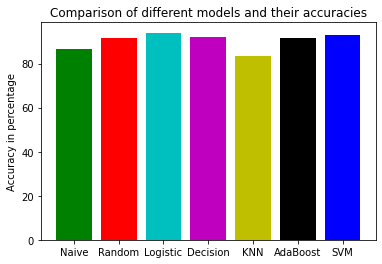

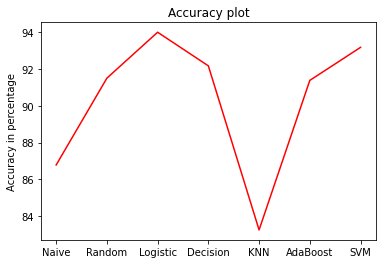

In [11]:
all_model_accuracies = [np.max(accuracy1), np.max(accuracy2), np.max(accuracy3), np.max(accuracy4), np.max(accuracy5), np.max(accuracy6), np.max(accuracy7)]
all_model_names = ['Naive', 'Random', 'Logistic', 'Decision', 'KNN', 'AdaBoost', 'SVM']
all_model_trainingtime = [(trainingtime1/60), (trainingtime2/60), (trainingtime3/60), (trainingtime4/60), (trainingtime5/60), (trainingtime6/60), (trainingtime7/60)]
plt.title("Comparison of different models and their accuracies")
plt.ylabel("Accuracy in percentage")
plt.bar(all_model_names, all_model_accuracies, width=0.8, color = 'grcmykb')
plt.show()
print("\n")
plt.ylabel("Accuracy in percentage")
plt.title("Accuracy plot")
plt.plot(all_model_names, all_model_accuracies, color='red')
plt.show()

# Training time comparison and visualization of different models

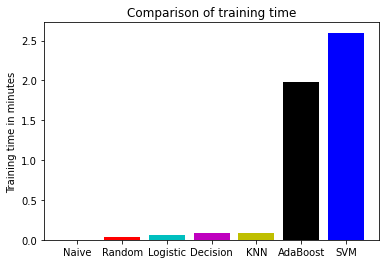

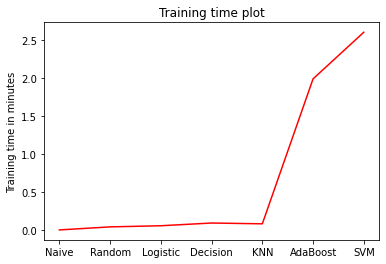

In [12]:
plt.bar(all_model_names, all_model_trainingtime, color = 'grcmykb')
plt.title("Comparison of training time")
plt.ylabel("Training time in minutes")
plt.show()
print("\n")
plt.plot(all_model_names, all_model_trainingtime, color='red')
plt.title("Training time plot")
plt.ylabel("Training time in minutes")
plt.show()